## Business Scenario

Suppose we are working as a data scientist for a FMCG company and want to segment our customers to help the marketing department for them to launch new products and sales based on the segmentation. Therefore we will save our time and money by marketing a specific group of customers with selected products.

How Did we collect the data by the way?

All data has been collected through the loyalty cards they use at checkout :)

We will utilize K-Means and PCA algorithms for this project and see how we define new grouped customers!



## Understanding Data is Important!

Before starting any project, We need to understand the business problem and dataset first.

Let’s see the variables(features) in the dataset.


## Variable Description

ID: Shows a unique identification of a customer.

Sex: Biological sex (gender) of a customer. In this dataset, there are only 2 different options.

0: male

1: female

Marital status: Marital status of a customer.

0: single

1: non-single (divorced / separated / married / widowed)

Age: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of the creation of the dataset

18 Min value (the lowest age observed in the dataset)

76 Max value (the highest age observed in the dataset)

Education: Level of education of the customer.

0:other / unknown

1: high school

2: university

3: graduate school

Income: Self-reported annual income in US dollars of the customer.

35832 Min value (the lowest income observed in the dataset)

309364 Max value (the highest income observed in the dataset)

Occupation: Category of occupation of the customer.

0: unemployed/unskilled

1: skilled employee / official

2: management / self-employed / highly qualified employee / officer

Settlement size: The size of the city that the customer lives in.

0: small city

1: mid-sized city

2: big city



In [80]:
import warnings
warnings.simplefilter('ignore')

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [82]:
df = pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [83]:
df.set_index(['ID'],inplace = True)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [84]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


No missing values

## First-step analysis

A good way to get initial understading of the relationship between the different variables is to explore their correlations.

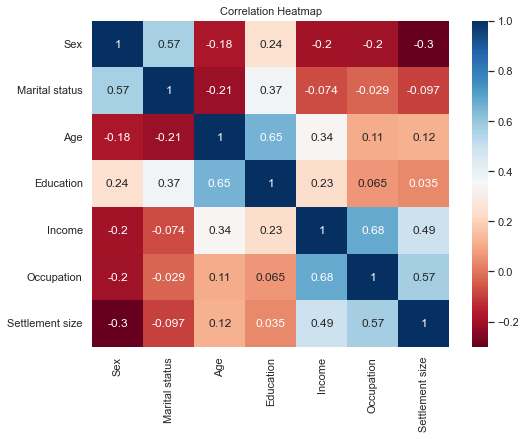

In [86]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap = 'RdBu')
plt.title('Correlation Heatmap', fontsize = 11)
plt.yticks(rotation = 0)
plt.show()

There is a strong correlation between Age and Education, Occupation and Income.

Age higher, education level higher

occupation level higher, income level higher

## visualise raw data

Text(0.5, 1.0, 'Age VS. Income')

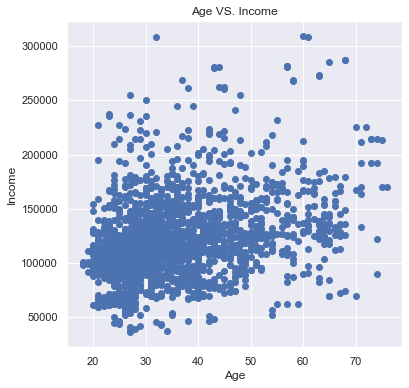

In [87]:
plt.figure(figsize = (6,6))
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title("Age VS. Income")

## Standardisation

In [88]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [89]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)

Before applying K-Means, we need to choose how many clusters we would like to have.

Within Clusters Sum of Squares (WCSS) and Elbow Method.

In [90]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

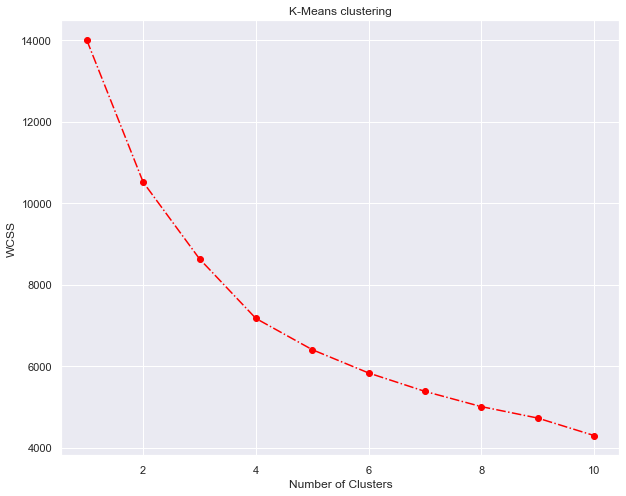

In [91]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title("K-Means clustering")
plt.show()

We try to use clusters = 4

In [92]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [93]:
# We create a new data frame with the original features and add a new column 
# with the assigned clusters for each point.
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [94]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1,fewer opportunities
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focused


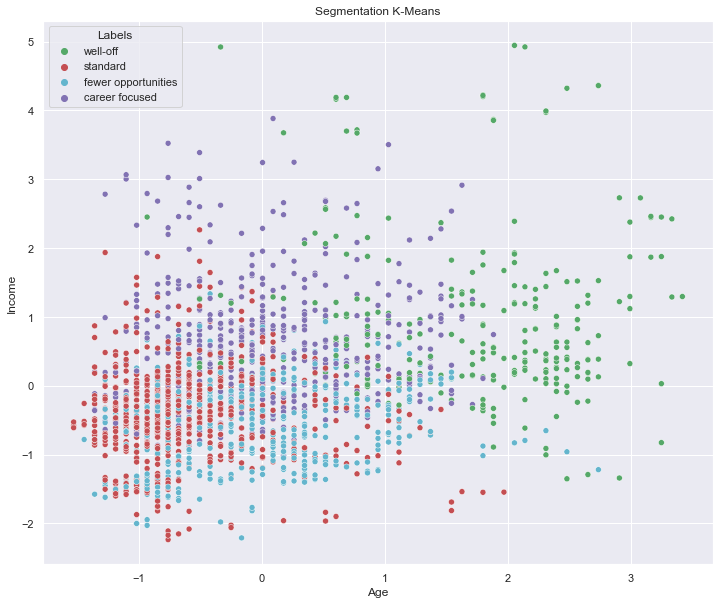

In [95]:
# plot the results
x_axis = df_segm_kmeans["Age"]
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

## PCA

In [112]:
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(data = df_std,columns = df.columns)
df_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [113]:
pca= PCA()

pca.fit(df_std)

# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

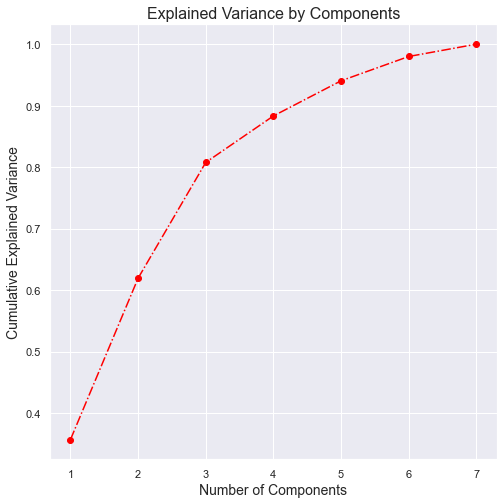

In [114]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.

plt.figure(figsize = (8,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker ='o',  linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

According to the plot above, we let n_components = 3

In [115]:
pca = PCA(n_components = 3)
pca.fit(df_std)

PCA(n_components=3)

In [116]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [117]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


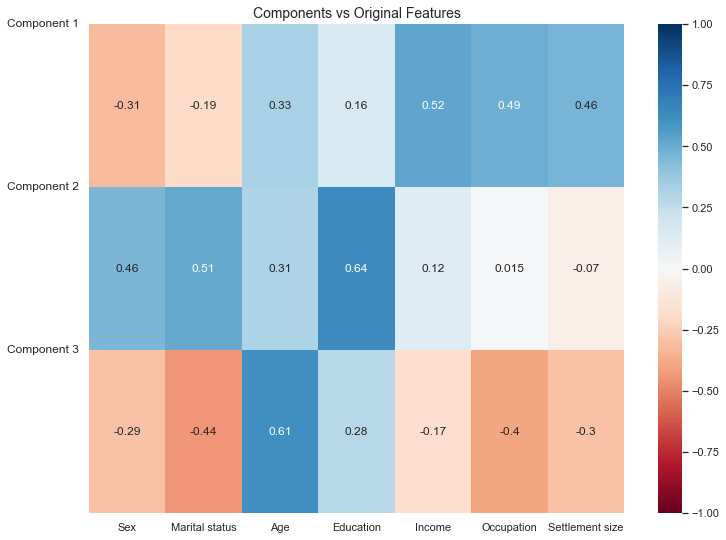

In [118]:
# Heat Map for Principal Components against original features. 
# Again we use the RdBu color scheme and set borders to -1 and 1.

plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 0,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [119]:
scores_pca = pca.transform(df_std)

In [121]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans.labels_

In [122]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,1.705835,2.031437,0.836957
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,-0.923797,-0.931458,0.983810
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,-1.154330,0.698594,-0.733040
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,1.389408,-1.046391,-0.276923


In [123]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,1.705835,2.031437,0.836957,263,0.1315
career focused,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,-0.923797,-0.931458,0.983810,462,0.2310
fewer opportunities,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,-1.154330,0.698594,-0.733040,705,0.3525
well-off,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,1.389408,-1.046391,-0.276923,570,0.2850


In [126]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [129]:
df_segm_pca_kmeans['Legends'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

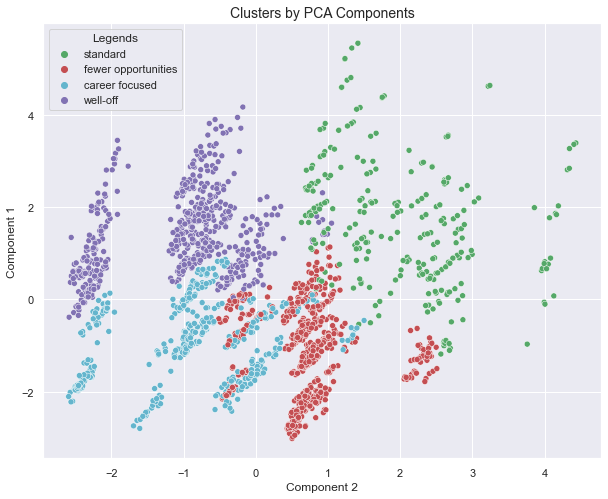

In [130]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legends'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()